## INFOSYS STOCK MARKETING PRICE PREDICTION FROM [01-07-2015 to 01-07-2020(5 Years)]
### DATASET FROM NSE India (National Stock Exchange of India Ltd)
### LINEAR REGRESSION 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
INFOSYS=pd.read_csv("C://Users//Win7//Desktop//ml projects//Stock-Market-Price-Prediction-master//Stock-Market-Price-Prediction-master//INFY.NS.csv")
INFOSYS.head()

Date   Open        High         Low       Close   Adj Close  \
0  2015-07-01  494.5  502.500000  493.000000  498.700012  415.561249   
1  2015-07-02  499.5  500.700012  492.524994  494.000000  411.644745   
2  2015-07-03  494.0  496.500000  491.000000  495.149994  412.603058   
3  2015-07-06  492.5  494.000000  487.500000  491.649994  409.686493   
4  2015-07-07  492.5  495.000000  489.500000  490.250000  408.519897   

      Volume  
0  6880852.0  
1  4007568.0  
2  2695306.0  
3  4305602.0  
4  3497418.0

In [4]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [5]:
INFOSYS.isnull()

Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
1223  False  False  False  False  False      False   False
1224  False  False  False  False  False      False   False
1225  False  False  False  False  False      False   False
1226  False  False  False  False  False      False   False
1227  False  False  False  False  False      False   False

[1228 rows x 7 columns]

In [6]:
INFOSYS.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
INFOSYS.isnull().sum().sum()

6

In [8]:
INFOSYS.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
np.unique(INFOSYS["Date"])

array(['2015-07-01', '2015-07-02', '2015-07-03', ..., '2020-06-25',
       '2020-06-26', '2020-06-29'], dtype=object)

In [10]:
np.unique(INFOSYS["Open"])

array([440.      , 441.274994, 442.25    , ..., 836.799988, 843.299988,
              nan])

In [11]:
np.unique(INFOSYS["High"])

array([443.799988, 443.875   , 445.899994, ..., 840.299988, 847.      ,
              nan])

In [12]:
np.unique(INFOSYS["Low"])

array([430.      , 435.      , 436.825012, ..., 827.549988, 835.049988,
              nan])

In [13]:
np.unique(INFOSYS["Close"])

array([436.700012, 437.700012, 439.350006, ..., 834.049988, 840.150024,
              nan])

In [14]:
np.unique(INFOSYS["Adj Close"])

array([390.604187, 390.812531, 395.874756, ..., 804.153748, 810.035217,
              nan])

In [15]:
np.unique(INFOSYS["Volume"])

array([7.5895600e+05, 1.0914340e+06, 1.2300540e+06, ..., 9.0407176e+07,
       1.6440496e+08,           nan])

In [16]:
INFOSYS["Date"].value_counts()

2016-01-20    1
2015-08-17    1
2017-05-02    1
2018-11-15    1
2019-02-15    1
             ..
2020-03-04    1
2015-11-02    1
2020-01-16    1
2016-08-02    1
2017-11-02    1
Name: Date, Length: 1228, dtype: int64

In [17]:
INFOSYS["Open"].value_counts()

465.000000    7
590.000000    6
492.500000    6
515.000000    5
472.500000    5
             ..
715.950012    1
764.000000    1
689.275024    1
476.750000    1
485.024994    1
Name: Open, Length: 1009, dtype: int64

In [18]:
INFOSYS["High"].value_counts()

520.000000    4
599.500000    4
493.049988    3
493.750000    3
730.000000    3
             ..
485.524994    1
743.200012    1
692.200012    1
597.450012    1
700.950012    1
Name: High, Length: 1089, dtype: int64

In [19]:
INFOSYS["Low"].value_counts()

580.000000    6
545.000000    5
678.000000    4
715.000000    4
530.000000    3
             ..
610.025024    1
571.625000    1
748.000000    1
625.299988    1
781.099976    1
Name: Low, Length: 1098, dtype: int64

In [20]:
INFOSYS["Close"].value_counts()

721.049988    3
708.099976    3
754.900024    3
594.974976    3
510.649994    2
             ..
707.400024    1
782.549988    1
502.575012    1
759.299988    1
661.275024    1
Name: Close, Length: 1156, dtype: int64

In [21]:
INFOSYS["Adj Close"].value_counts()

501.403931    2
456.600006    2
548.868347    2
772.238098    2
538.590637    2
             ..
799.574097    1
543.555542    1
686.998352    1
459.311432    1
630.467896    1
Name: Adj Close, Length: 1208, dtype: int64

In [22]:
INFOSYS["Volume"].value_counts()

7334511.0     1
9140684.0     1
8947614.0     1
3679845.0     1
8926058.0     1
             ..
5686016.0     1
5919494.0     1
12281903.0    1
5360622.0     1
9277241.0     1
Name: Volume, Length: 1227, dtype: int64

In [23]:
INFOSYS.describe()

Open         High          Low        Close    Adj Close  \
count  1227.000000  1227.000000  1227.000000  1227.000000  1227.000000   
mean    605.359984   611.994194   598.518723   605.161715   557.417386   
std     103.981567   105.130168   103.068678   104.111674   118.345056   
min     440.000000   443.799988   430.000000   436.700012   390.604187   
25%     514.187500   519.762482   509.349991   513.974976   451.269745   
50%     586.025024   592.450012   580.000000   585.950012   517.107422   
75%     704.924988   711.725006   695.975006   704.262512   676.590088   
max     843.299988   847.000000   835.049988   840.150024   810.035217   

             Volume  
count  1.227000e+03  
mean   8.675740e+06  
std    7.941786e+06  
min    7.589560e+05  
25%    5.361510e+06  
50%    7.023516e+06  
75%    9.551616e+06  
max    1.644050e+08

In [24]:
INFOSYS_NEW=INFOSYS.dropna(axis = 0)
INFOSYS_NEW

Date        Open        High         Low       Close   Adj Close  \
0     2015-07-01  494.500000  502.500000  493.000000  498.700012  415.561249   
1     2015-07-02  499.500000  500.700012  492.524994  494.000000  411.644745   
2     2015-07-03  494.000000  496.500000  491.000000  495.149994  412.603058   
3     2015-07-06  492.500000  494.000000  487.500000  491.649994  409.686493   
4     2015-07-07  492.500000  495.000000  489.500000  490.250000  408.519897   
...          ...         ...         ...         ...         ...         ...   
1223  2020-06-23  695.700012  724.500000  692.099976  720.650024  720.650024   
1224  2020-06-24  716.900024  726.799988  709.400024  714.150024  714.150024   
1225  2020-06-25  704.849976  705.599976  693.500000  700.500000  700.500000   
1226  2020-06-26  710.200012  751.599976  710.000000  748.200012  748.200012   
1227  2020-06-29  735.400024  744.700012  730.099976  731.750000  731.750000   

          Volume  
0      6880852.0  
1      4007568.0  
2      2695306.0  
3      4305602.0  
4      3497418.0  
...          ...  
1223  12157390.0  
1224  10220838.0  
1225  14945284.0  
1226  26030458.0  
1227   8954428.0  

[1227 rows x 7 columns]

In [25]:
INFOSYS_NEW.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

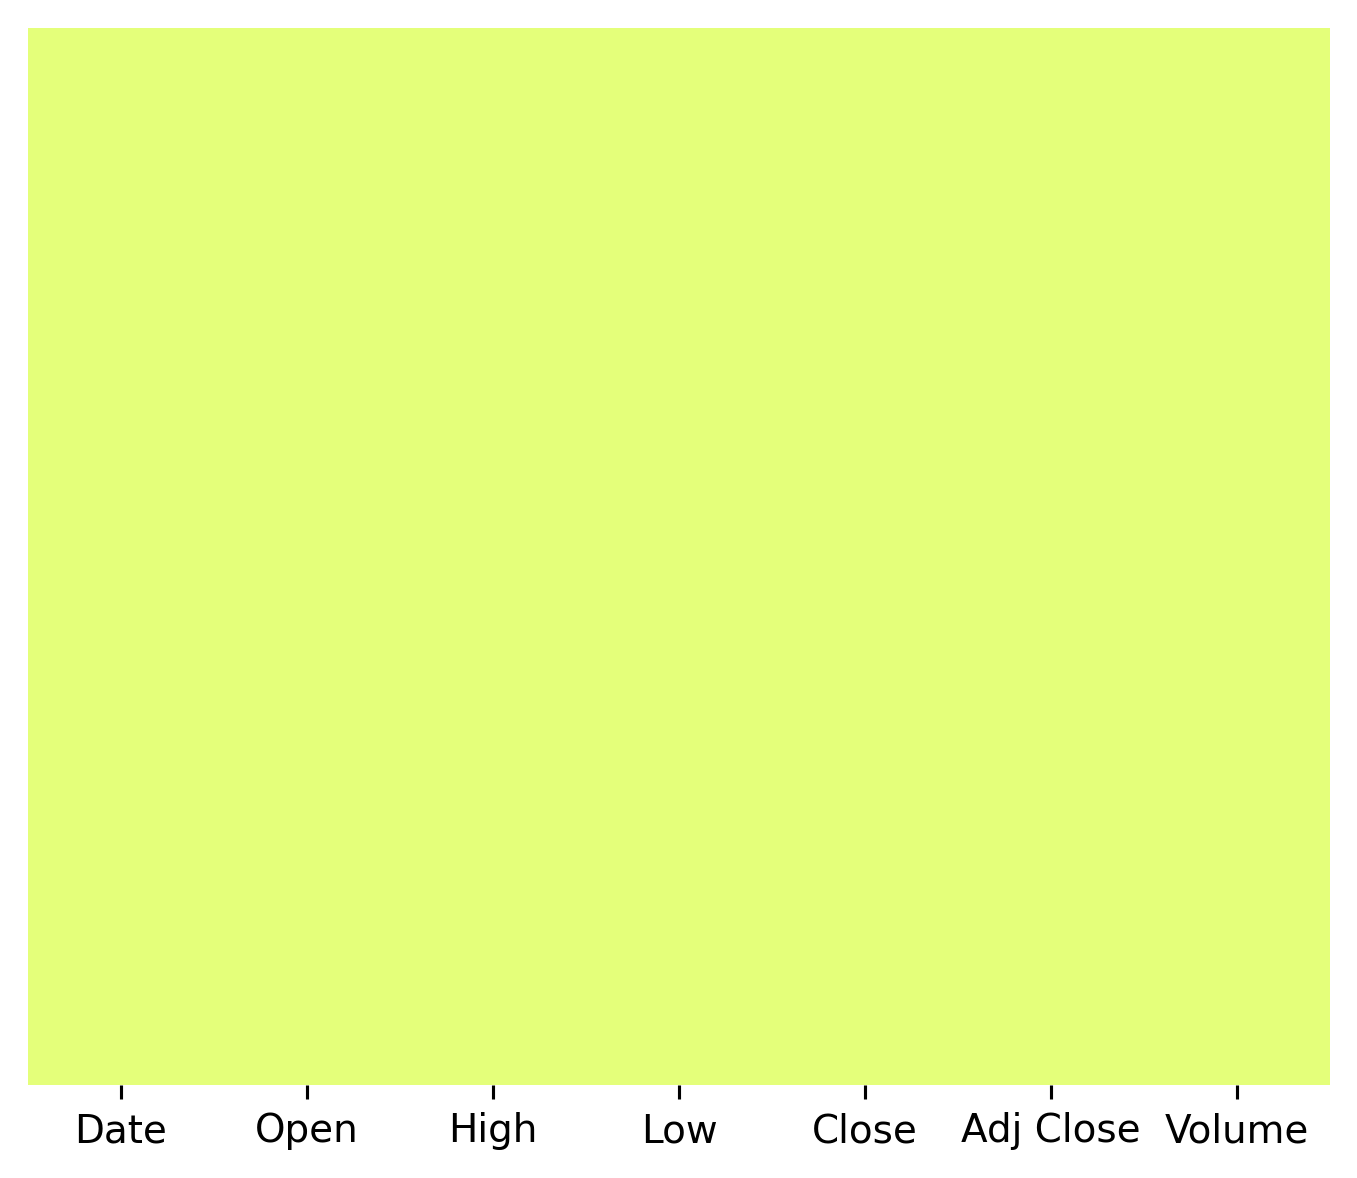

In [26]:
fig=plt.figure(figsize=(6,5),dpi=280)
sns.heatmap(INFOSYS_NEW.isnull(), yticklabels=False, cbar=False, cmap='Wistia')
plt.show()

### Hence, There is no missing values.

In [27]:
INFOSYS_NEW.describe()

Open         High          Low        Close    Adj Close  \
count  1227.000000  1227.000000  1227.000000  1227.000000  1227.000000   
mean    605.359984   611.994194   598.518723   605.161715   557.417386   
std     103.981567   105.130168   103.068678   104.111674   118.345056   
min     440.000000   443.799988   430.000000   436.700012   390.604187   
25%     514.187500   519.762482   509.349991   513.974976   451.269745   
50%     586.025024   592.450012   580.000000   585.950012   517.107422   
75%     704.924988   711.725006   695.975006   704.262512   676.590088   
max     843.299988   847.000000   835.049988   840.150024   810.035217   

             Volume  
count  1.227000e+03  
mean   8.675740e+06  
std    7.941786e+06  
min    7.589560e+05  
25%    5.361510e+06  
50%    7.023516e+06  
75%    9.551616e+06  
max    1.644050e+08

In [28]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [29]:
INFOSYS_NEW['Date']=pd.to_datetime(INFOSYS_NEW['Date'])

In [30]:
print(f'DataFrame contains Stock Prices between {INFOSYS_NEW.Date.min()} {INFOSYS_NEW.Date.max()}')
print(f'Total Days = {(INFOSYS_NEW.Date.max()- INFOSYS_NEW.Date.min()).days} days')

DataFrame contains Stock Prices between 2015-07-01 00:00:00 2020-06-29 00:00:00
Total Days = 1825 days


In [31]:
INFOSYS_NEW[['Open','High','Low','Close','Adj Close']].plot(kind='box')

<AxesSubplot:>

In [32]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS_NEW['Date'], 'y':INFOSYS_NEW['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [33]:
iplot(plot)

In [34]:
#fig=plt.figure(figsize=(2,2))
sns.set(style='whitegrid',context='notebook')
cols=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']
sns.pairplot(INFOSYS_NEW[cols],size=3)
plt.tight_layout()
plt.show()

In [35]:
import seaborn as sns
corr = INFOSYS_NEW.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')


In [36]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [37]:
X= np.array(INFOSYS_NEW.index).reshape(-1,1)
Y= INFOSYS_NEW['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)


In [38]:
scaler = StandardScaler().fit(X_train)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

In [41]:
Model.score(X_train, Y_train)

0.53336040894479

In [42]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = Model.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

INFOSYS_DATA = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=INFOSYS_DATA, layout=layout)

In [43]:
iplot(plot2)

In [44]:
Accuracy_With_LiearRegression = Model.score(X_train, Y_train)
Accuracy_With_LiearRegression

0.53336040894479

In [45]:
scores = f''' 
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, Model.predict(X_train))}\t{r2_score(Y_test, Model.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, Model.predict(X_train))}\t{mse(Y_test, Model.predict(X_test))}
'''

print(scores)

 
Metric           Train                Test        
r2_score  0.53336040894479	0.5070011432015731
MSE       5156.621708431318	5064.035457289703



In [46]:
print(f'Accucary of INFOSYS STOCK MARKETING using Linear Regression is', Accuracy_With_LiearRegression)

Accucary of INFOSYS STOCK MARKETING using Linear Regression is 0.53336040894479


In [47]:
x = INFOSYS_NEW[['Open', 'High', 'Low', 'Adj Close']].values
y = INFOSYS_NEW[["Close"]].values

In [48]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [49]:
def polynomialRegression(degree):
    
    x= np.array(INFOSYS_NEW.index).reshape(-1,1)
    y= INFOSYS_NEW['Close']


    
    quadratic_featurizer = PolynomialFeatures(degree)
    x_quadratic = quadratic_featurizer.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x_quadratic,y,test_size=0.3, random_state=0)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(x_train, y_train)
    
    print('Residual sum of squares train: %.2f' % np.mean((regressor_quadratic.predict(x_train)- y_train) ** 2))
    print('Residual sum of squares test: %.2f' % np.mean((regressor_quadratic.predict(x_test)- y_test) ** 2))

In [50]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [51]:
i = interact(polynomialRegression, degree=(1,100))

interactive(children=(IntSlider(value=50, description='degree', min=1), Output()), _dom_classes=('widget-inter…